In [82]:
# Mahesh Utlapalli -- Naive Bayes Classification Method



In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data11=pd.read_csv("Bachelor_Degree_Majors.csv")
clean_data=pd.read_csv("CleanedData.csv")

In [2]:
pd.set_option("display.max_rows", 10)
sns.set()
%matplotlib inline

In [3]:
plt.style.use('dark_background')

In [4]:
data11

,State,Sex,Age Group,Bachelor's Degree Holders,Science and Engineering,Science and Engineering Related Fields,Business,Education,"Arts, Humanities and Others"
0,Alabama,Total,25 and older,"885,357","263,555","98,445","210,147","141,071","172,139"
1,Alabama,Total,25 to 39,"268,924","90,736","32,378","58,515","29,342","57,953"
2,Alabama,Total,40 to 64,"418,480","115,762","46,724","112,271","63,875","79,848"
3,Alabama,Total,65 and older,"197,953","57,057","19,343","39,361","47,854","34,338"
4,Alabama,Male,25 and older,"405,618","159,366","26,004","113,909","29,490","76,849"
...,...,...,...,...,...,...,...,...,...
607,Wyoming,Male,65 and older,"16,482","9,375","1,145","2,011","2,378","1,573"
608,Wyoming,Female,25 and older,"59,074","15,570","8,470","6,856","16,638","11,540"
609,Wyoming,Female,25 to 39,"18,180","6,708","2,268","1,936","3,313","3,955"
610,Wyoming,Female,40 to 64,"26,537","5,110","4,194","3,827","8,007","5,399"


In [5]:
data11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   State                                   612 non-null    object
 1   Sex                                     612 non-null    object
 2   Age Group                               612 non-null    object
 3   Bachelor's Degree Holders               612 non-null    object
 4   Science and Engineering                 612 non-null    object
 5   Science and Engineering Related Fields  612 non-null    object
 6   Business                                612 non-null    object
 7   Education                               612 non-null    object
 8   Arts, Humanities and Others             612 non-null    object
dtypes: object(9)
memory usage: 43.2+ KB


In [6]:
data11.isnull().sum()

State                                     0
Sex                                       0
Age Group                                 0
Bachelor's Degree Holders                 0
Science and Engineering                   0
Science and Engineering Related Fields    0
Business                                  0
Education                                 0
Arts, Humanities and Others               0
dtype: int64

In [7]:
data11.describe()

,State,Sex,Age Group,Bachelor's Degree Holders,Science and Engineering,Science and Engineering Related Fields,Business,Education,"Arts, Humanities and Others"
count,612,612,612,612,612,612,612,612,612
unique,51,3,4,612,612,608,611,608,611
top,Alabama,Total,25 and older,"885,357","263,555","39,091","25,810","8,260","33,222"
freq,12,204,153,1,1,2,2,2,2


In [8]:
# Converting data type from (Dtype: object) to (Dtype: int)

def convert(string):
    return int(string.replace(',', ''))


for column in data11.iloc[:,3:]:
    data11[column] = data11[column].apply(convert)

In [9]:
# Grouping the dataframe by states
dd1 = data11.groupby(['State']).sum().reset_index()

# Sorting the number of bachelor's degree holders in the descending order
dd1.sort_values(by="Bachelor's Degree Holders", ascending=False, inplace=True)

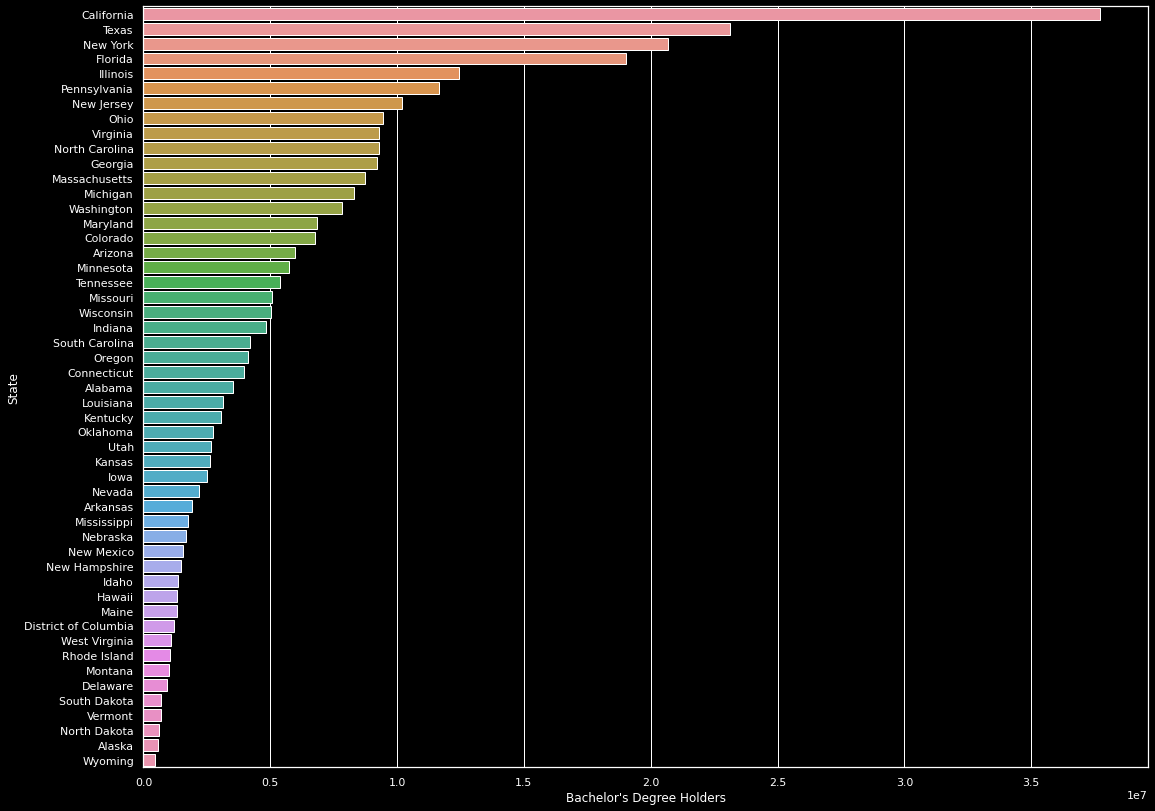

In [10]:
# Number of bachelor's degree holders by states

plt.figure(figsize=(18,14))
sns.barplot(x="Bachelor's Degree Holders", y="State", data=dd1);

In [11]:
# Highest number of bachelor's degree holders are in: California, Texas, New York and Florida.
# Lowest number of bachelor's degree holders are in: Vermont, North Dakota, Alaska and Wyoming.

In [12]:
data11.reset_index(drop=True, inplace=True)

In [13]:
data2 = data11.groupby(['State']).sum().reset_index()

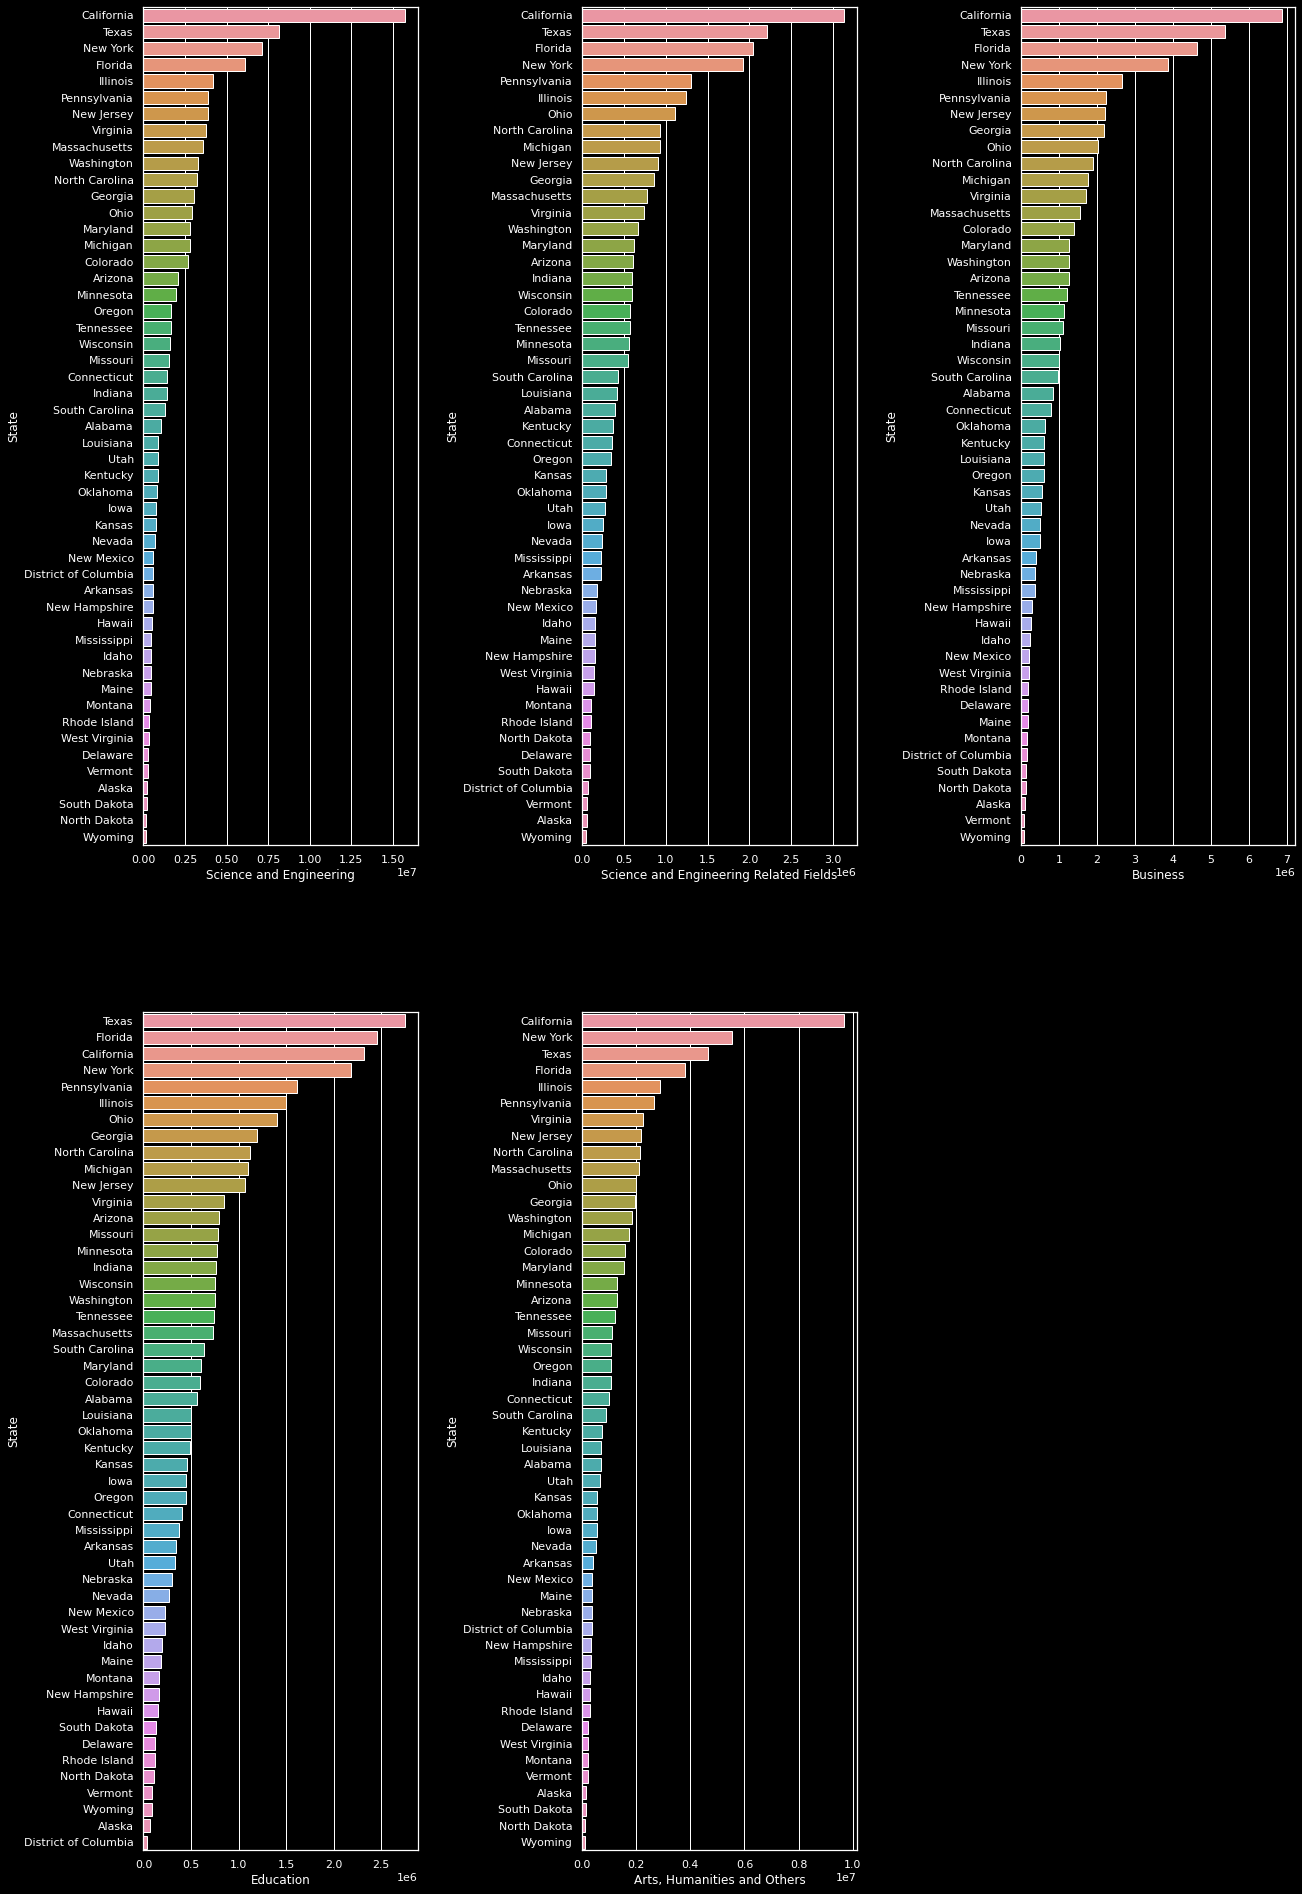

In [14]:
# Number of bachelor's degree holders by states in each major

columns = data2.columns[2:]

i=1
plt.figure(figsize=(20,32))

for col in columns:
    plt.subplot(2,3,i)
    sns.barplot(x=col, y='State', data=data2.sort_values(by=col, ascending=False))
    i+=1

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.6, hspace=0.2)

In [15]:
# California have the highest number of bachelor's degree holders across all majors except in education 
# where Texas take the lead.
# Wyoming have the lowest number of bachelor's degree holders across all majors except in education 
# where District of Columbia is the lowest.

In [16]:
data3 = data11.groupby(['State', 'Sex']).sum().reset_index()

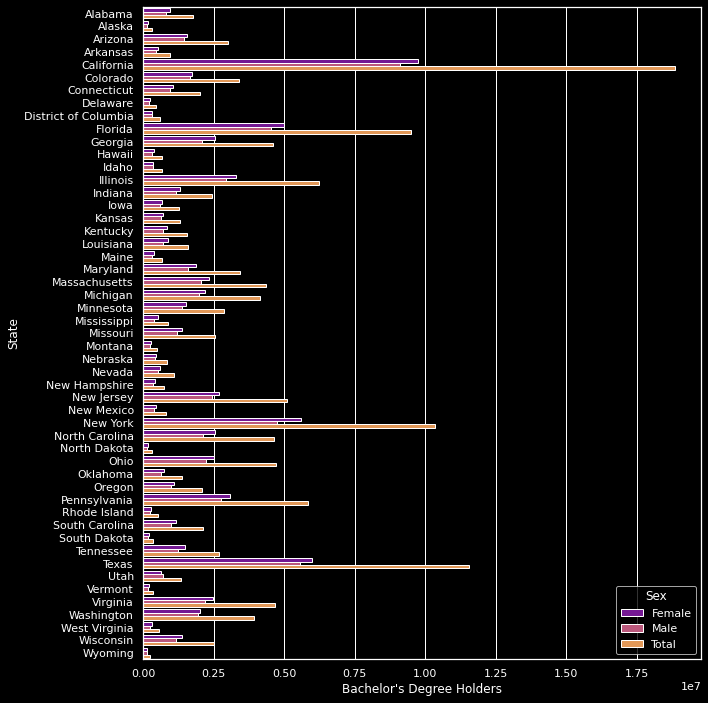

In [17]:
# Number of bachelor's degree holders by states based on sex

plt.figure(figsize=(10,12))
sns.barplot(x ="Bachelor's Degree Holders", y = "State", hue = "Sex", data = data3, palette='plasma');

In [18]:
# The state of 'Utah' is the only state where the number of males bachelor's degree holders is bigger than females.

In [19]:
data4 = data11.groupby(['State', 'Sex']).sum().reset_index()

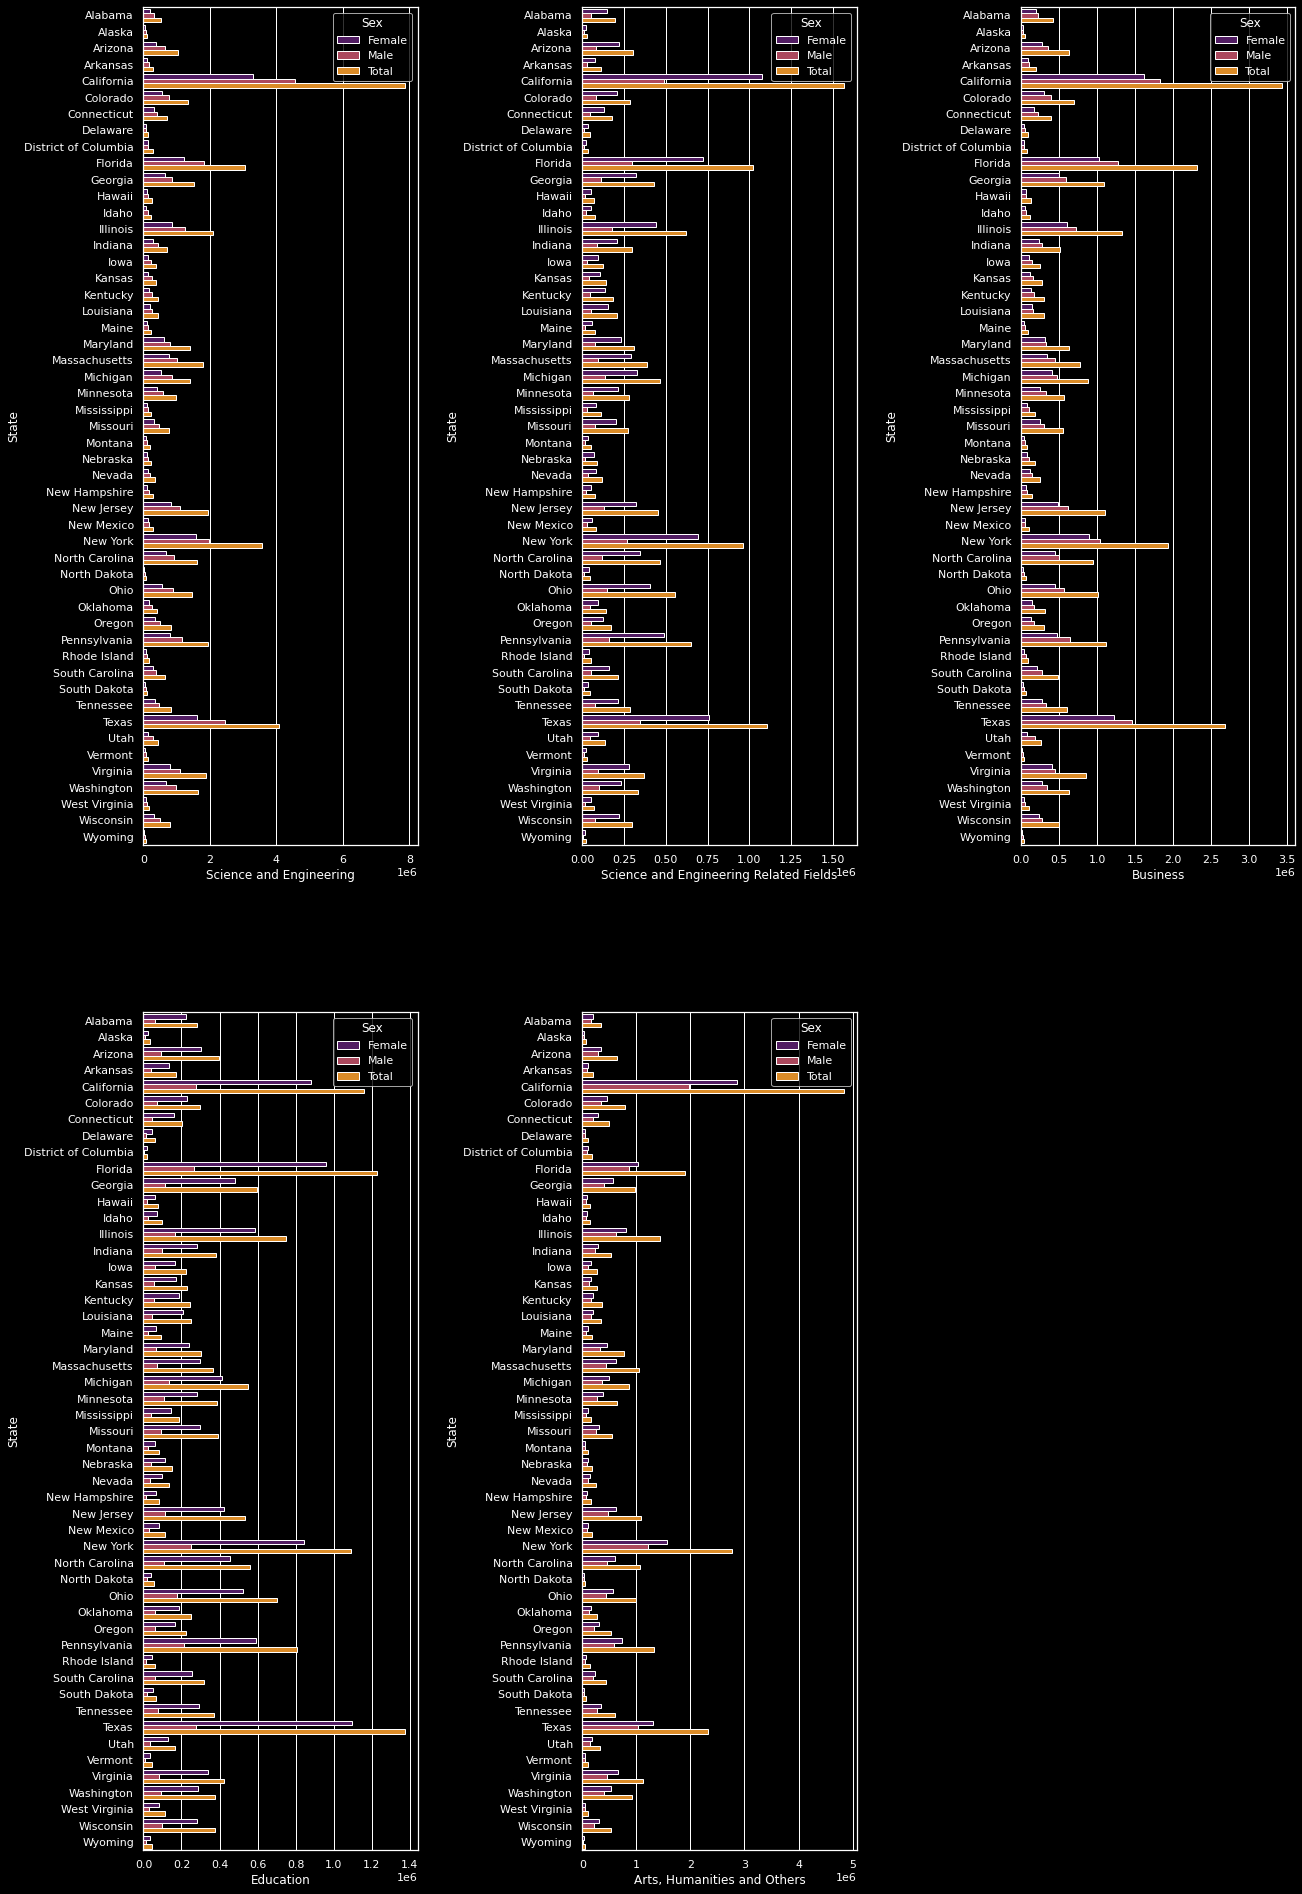

In [20]:
# Number of bachelor's degree holders by states based on sex in each major

columns = data4.columns[3:]

i=1
plt.figure(figsize=(20,32))

for col in columns:
    plt.subplot(2,3,i)
    #print('\n')
    sns.barplot(x = col, y = "State", hue = "Sex", data = data4, palette="inferno")
    i+=1

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.6, hspace=0.2)

In [21]:
# In 'Science and Engineering', number of males is higher than females in all states, except:
# Alaska, Delaware, Hawaii, Kentucky, Louisiana, Maine, Mississippi, Nebraska, New York, North Dakota, Rhode Island, 
# Tennessee, West Virginia.
# In 'Science and Engineering Related Fields', number of males is higher than females in all states, except:
# Alaska, Delaware, Hawaii, Kentucky, Louisiana, Maine, Mississippi, Nebraska, New York, North Dakota, Rhode Island, 
# Tennessee, West Virginia.
# In 'Business', number of males is higher than females in all states, except:
# District of Columbia. (We will see later in the EDA, that District of columbia have the highest percentage of 
# BS Holders per population)
# In 'Education', numbers of females is higher than males in all states.
# In 'Arts, Humanities and Others', numbers of females is higher than males in all states.

In [22]:
data5 = data11.groupby(['Sex', 'Age Group']).sum().reset_index()
data5

,Sex,Age Group,Bachelor's Degree Holders,Science and Engineering,Science and Engineering Related Fields,Business,Education,"Arts, Humanities and Others"
0,Female,25 and older,39399237,10874033,5273225,6818217,6747338,9686424
1,Female,25 to 39,13793883,4536165,1825300,2296595,1430716,3705107
2,Female,40 to 64,18147062,4877784,2443873,3814992,2778805,4231608
3,Female,65 and older,7458292,1460084,1004052,706630,2537817,1749709
4,Male,25 and older,35102414,15498198,2038520,8262491,2002639,7300566
...,...,...,...,...,...,...,...,...
7,Male,65 and older,7994071,3495798,449671,1766633,851831,1430138
8,Total,25 and older,74501651,26372231,7311745,15080708,8749977,16986990
9,Total,25 to 39,25115357,9657853,2472329,4812903,1789412,6382860
10,Total,40 to 64,33933931,11758496,3385693,7794542,3570917,7424283


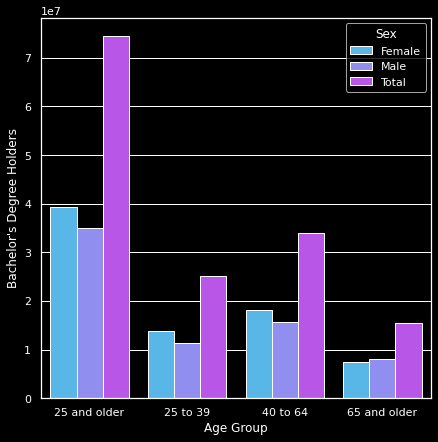

In [23]:
# Number of females, males and total based on age group

plt.figure(figsize=(7,7))
sns.barplot(x = 'Age Group', y = "Bachelor's Degree Holders", hue = "Sex", data = data5, palette="cool");

In [24]:
# Number of males is higher than females only in the '65 and older' age group and not considering with total

In [25]:
data6 = data11.groupby(['Sex', 'Age Group']).sum().reset_index()
data6

,Sex,Age Group,Bachelor's Degree Holders,Science and Engineering,Science and Engineering Related Fields,Business,Education,"Arts, Humanities and Others"
0,Female,25 and older,39399237,10874033,5273225,6818217,6747338,9686424
1,Female,25 to 39,13793883,4536165,1825300,2296595,1430716,3705107
2,Female,40 to 64,18147062,4877784,2443873,3814992,2778805,4231608
3,Female,65 and older,7458292,1460084,1004052,706630,2537817,1749709
4,Male,25 and older,35102414,15498198,2038520,8262491,2002639,7300566
...,...,...,...,...,...,...,...,...
7,Male,65 and older,7994071,3495798,449671,1766633,851831,1430138
8,Total,25 and older,74501651,26372231,7311745,15080708,8749977,16986990
9,Total,25 to 39,25115357,9657853,2472329,4812903,1789412,6382860
10,Total,40 to 64,33933931,11758496,3385693,7794542,3570917,7424283


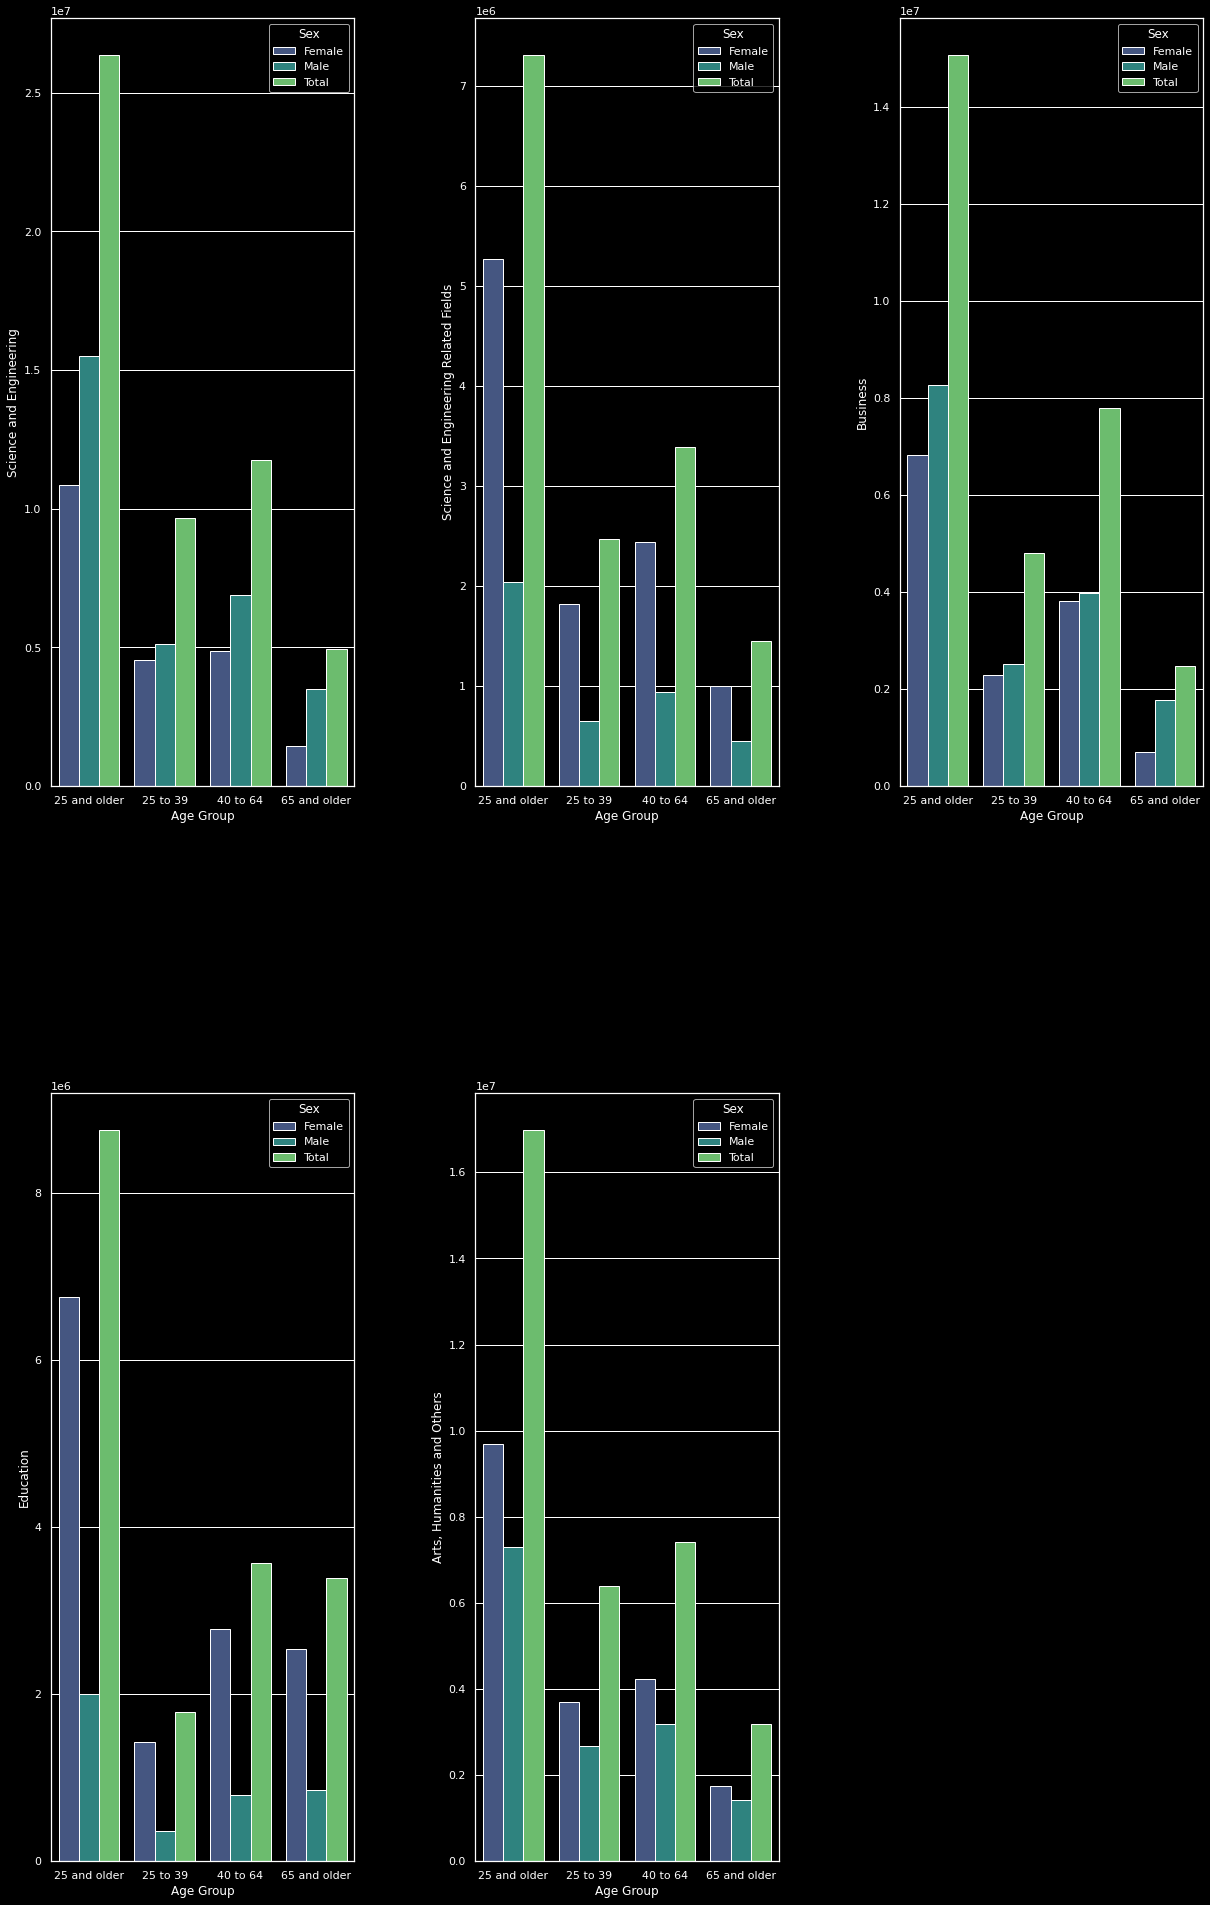

In [26]:
# Number of females, males and total based on age group in each major¶

columns = data6.columns[3:]

i=1
plt.figure(figsize=(20,32))

for col in columns:
	plt.subplot(2,3,i)
	sns.barplot(x = 'Age Group', y = col, hue = "Sex", data = data6, palette="viridis")
	i+=1

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

In [27]:
# In 'Science and engineering', number of males is higher than females in each and every age groups.
# In 'Science and engineering related fields', number of females is higher than males in each and every age groups.
# In 'Business', number of males is higher than females in each and every age groups.
# In 'Education' and 'Arts, Humanities and Others', number of females is higher than males in all age groups.

In [28]:
print(data11['Sex'].unique())
print(data11['Age Group'].unique())

['Total' 'Male' 'Female']
['25 and older' '25 to 39' '40 to 64' '65 and older']


In [29]:
from sklearn.preprocessing import LabelEncoder

sex_encoding = LabelEncoder()

In [30]:
sex_encoding.fit(data11['Sex'])

LabelEncoder()

In [31]:
sex_values=sex_encoding.transform(data11['Sex'])

In [32]:
print("Before Encoding:", list(data11['Sex'][-612:]))
print('\n')
print("After Encoding:", sex_values[-612:])

Before Encoding: ['Total', 'Total', 'Total', 'Total', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Total', 'Total', 'Total', 'Total', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Total', 'Total', 'Total', 'Total', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Total', 'Total', 'Total', 'Total', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Total', 'Total', 'Total', 'Total', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Total', 'Total', 'Total', 'Total', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Total', 'Total', 'Total', 'Total', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Total', 'Total', 'Total', 'Total', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Total', 'Total', 'Total', 'Total', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Total', '

In [33]:
print(type(sex_values))

<class 'numpy.ndarray'>


In [34]:
data11=data11

In [35]:
data11['Sex_N'] = sex_values.tolist()

In [36]:
data11

,State,Sex,Age Group,Bachelor's Degree Holders,Science and Engineering,Science and Engineering Related Fields,Business,Education,"Arts, Humanities and Others",Sex_N
0,Alabama,Total,25 and older,885357,263555,98445,210147,141071,172139,2
1,Alabama,Total,25 to 39,268924,90736,32378,58515,29342,57953,2
2,Alabama,Total,40 to 64,418480,115762,46724,112271,63875,79848,2
3,Alabama,Total,65 and older,197953,57057,19343,39361,47854,34338,2
4,Alabama,Male,25 and older,405618,159366,26004,113909,29490,76849,1
...,...,...,...,...,...,...,...,...,...,...
607,Wyoming,Male,65 and older,16482,9375,1145,2011,2378,1573,1
608,Wyoming,Female,25 and older,59074,15570,8470,6856,16638,11540,0
609,Wyoming,Female,25 to 39,18180,6708,2268,1936,3313,3955,0
610,Wyoming,Female,40 to 64,26537,5110,4194,3827,8007,5399,0


In [37]:
age_encoding = LabelEncoder()

In [38]:
age_encoding.fit(data11['Age Group'])

LabelEncoder()

In [39]:
age_values=age_encoding.transform(data11['Age Group'])

In [40]:
print("Before Encoding:", list(data11['Age Group'][-612:]))
print('\n')
print("After Encoding:", age_values[-612:])

Before Encoding: ['25 and older', '25 to 39', '40 to 64', '65 and older', '25 and older', '25 to 39', '40 to 64', '65 and older', '25 and older', '25 to 39', '40 to 64', '65 and older', '25 and older', '25 to 39', '40 to 64', '65 and older', '25 and older', '25 to 39', '40 to 64', '65 and older', '25 and older', '25 to 39', '40 to 64', '65 and older', '25 and older', '25 to 39', '40 to 64', '65 and older', '25 and older', '25 to 39', '40 to 64', '65 and older', '25 and older', '25 to 39', '40 to 64', '65 and older', '25 and older', '25 to 39', '40 to 64', '65 and older', '25 and older', '25 to 39', '40 to 64', '65 and older', '25 and older', '25 to 39', '40 to 64', '65 and older', '25 and older', '25 to 39', '40 to 64', '65 and older', '25 and older', '25 to 39', '40 to 64', '65 and older', '25 and older', '25 to 39', '40 to 64', '65 and older', '25 and older', '25 to 39', '40 to 64', '65 and older', '25 and older', '25 to 39', '40 to 64', '65 and older', '25 and older', '25 to 39', '4

In [41]:
print(type(age_values))

<class 'numpy.ndarray'>


In [42]:
data11['Age_N'] = age_values.tolist()

In [43]:
data11

,State,Sex,Age Group,Bachelor's Degree Holders,Science and Engineering,Science and Engineering Related Fields,Business,Education,"Arts, Humanities and Others",Sex_N,Age_N
0,Alabama,Total,25 and older,885357,263555,98445,210147,141071,172139,2,0
1,Alabama,Total,25 to 39,268924,90736,32378,58515,29342,57953,2,1
2,Alabama,Total,40 to 64,418480,115762,46724,112271,63875,79848,2,2
3,Alabama,Total,65 and older,197953,57057,19343,39361,47854,34338,2,3
4,Alabama,Male,25 and older,405618,159366,26004,113909,29490,76849,1,0
...,...,...,...,...,...,...,...,...,...,...,...
607,Wyoming,Male,65 and older,16482,9375,1145,2011,2378,1573,1,3
608,Wyoming,Female,25 and older,59074,15570,8470,6856,16638,11540,0,0
609,Wyoming,Female,25 to 39,18180,6708,2268,1936,3313,3955,0,1
610,Wyoming,Female,40 to 64,26537,5110,4194,3827,8007,5399,0,2


In [44]:
data11 = data11.drop(['Sex', 'Age Group'], axis = 1)

In [45]:
data11

,State,Bachelor's Degree Holders,Science and Engineering,Science and Engineering Related Fields,Business,Education,"Arts, Humanities and Others",Sex_N,Age_N
0,Alabama,885357,263555,98445,210147,141071,172139,2,0
1,Alabama,268924,90736,32378,58515,29342,57953,2,1
2,Alabama,418480,115762,46724,112271,63875,79848,2,2
3,Alabama,197953,57057,19343,39361,47854,34338,2,3
4,Alabama,405618,159366,26004,113909,29490,76849,1,0
...,...,...,...,...,...,...,...,...,...
607,Wyoming,16482,9375,1145,2011,2378,1573,1,3
608,Wyoming,59074,15570,8470,6856,16638,11540,0,0
609,Wyoming,18180,6708,2268,1936,3313,3955,0,1
610,Wyoming,26537,5110,4194,3827,8007,5399,0,2


In [46]:
new_data = data11[data11["Sex_N"] != 2]

In [47]:
new_data

,State,Bachelor's Degree Holders,Science and Engineering,Science and Engineering Related Fields,Business,Education,"Arts, Humanities and Others",Sex_N,Age_N
4,Alabama,405618,159366,26004,113909,29490,76849,1,0
5,Alabama,117794,50188,7712,29859,6357,23678,1,1
6,Alabama,184328,67977,12331,54931,12820,36269,1,2
7,Alabama,103496,41201,5961,29119,10313,16902,1,3
8,Alabama,479739,104189,72441,96238,111581,95290,0,0
...,...,...,...,...,...,...,...,...,...
607,Wyoming,16482,9375,1145,2011,2378,1573,1,3
608,Wyoming,59074,15570,8470,6856,16638,11540,0,0
609,Wyoming,18180,6708,2268,1936,3313,3955,0,1
610,Wyoming,26537,5110,4194,3827,8007,5399,0,2


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [49]:
x=new_data.iloc[:,[1,2,3,4,5,6]].values
y=new_data.iloc[:,7].values

In [50]:
x

array([[405618, 159366,  26004, 113909,  29490,  76849],
       [117794,  50188,   7712,  29859,   6357,  23678],
       [184328,  67977,  12331,  54931,  12820,  36269],
       ...,
       [ 18180,   6708,   2268,   1936,   3313,   3955],
       [ 26537,   5110,   4194,   3827,   8007,   5399],
       [ 14357,   3752,   2008,   1093,   5318,   2186]])

In [51]:
y

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)

In [53]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [54]:
# making predictions on the testing set
y_pred = gnb.predict(x_test)

In [55]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 74.50980392156863


In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", abs(accuracy_score(y_test, y_pred)*100))
cm

Accuracy :  74.50980392156863


array([[17, 25],
       [ 1, 59]])

In [57]:
data11

,State,Bachelor's Degree Holders,Science and Engineering,Science and Engineering Related Fields,Business,Education,"Arts, Humanities and Others",Sex_N,Age_N
0,Alabama,885357,263555,98445,210147,141071,172139,2,0
1,Alabama,268924,90736,32378,58515,29342,57953,2,1
2,Alabama,418480,115762,46724,112271,63875,79848,2,2
3,Alabama,197953,57057,19343,39361,47854,34338,2,3
4,Alabama,405618,159366,26004,113909,29490,76849,1,0
...,...,...,...,...,...,...,...,...,...
607,Wyoming,16482,9375,1145,2011,2378,1573,1,3
608,Wyoming,59074,15570,8470,6856,16638,11540,0,0
609,Wyoming,18180,6708,2268,1936,3313,3955,0,1
610,Wyoming,26537,5110,4194,3827,8007,5399,0,2


In [58]:
data11 = data11[data11["Sex_N"] != 2]

In [59]:
# Source: U.S. Census Bureau, Population Division
# https://www.census.gov/newsroom/press-kits/2019/national-state-estimates.html


In [60]:
data22=pd.read_csv("nst-est2019-alldata.csv")

In [61]:
data22

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,10,0,0,0,United States,308745538,308758105,309321666,311556874,313830990,...,0.000000,2.493773,2.682083,2.636187,2.921500,3.260435,3.252788,2.871957,2.153911,1.818059
1,20,1,0,0,Northeast Region,55317240,55318443,55380134,55604223,55775216,...,-5.254530,0.887909,-0.038355,-0.469783,-0.986097,-2.061965,-2.490484,-1.837048,-2.134447,-2.859713
2,20,2,0,0,Midwest Region,66927001,66929725,66974416,67157800,67336743,...,-2.365881,-0.963930,-0.973943,-0.006924,-0.762969,-1.388437,-1.241784,-0.557370,-0.922755,-1.111173
3,20,3,0,0,South Region,114555744,114563030,114866680,116006522,117241208,...,3.261349,5.130513,5.850458,5.292073,6.161501,7.277358,7.150074,6.198168,5.225519,5.203720
4,20,4,0,0,West Region,71945553,71946907,72100436,72788329,73477823,...,0.614245,2.723344,3.062896,3.162262,4.026429,4.987285,5.261078,4.021194,3.044951,2.312083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,40,4,9,53,Washington,6724540,6724540,6742830,6826627,6897058,...,4.950999,6.906540,4.878573,4.473256,7.799901,10.408549,13.254138,12.865626,9.468242,8.135276
53,40,3,5,54,West Virginia,1852994,1853018,1854239,1856301,1856872,...,-3.933336,1.901071,0.828402,-0.825701,-1.779985,-2.551781,-4.330978,-5.336583,-4.484031,-4.127417
54,40,2,3,55,Wisconsin,5686986,5687285,5690475,5705288,5719960,...,-0.247295,-0.777306,-0.834993,0.066337,-0.421473,-1.068755,-0.628600,0.729926,0.763089,0.327262
55,40,4,8,56,Wyoming,563626,563775,564487,567299,576305,...,-1.750320,-0.379930,10.019202,4.863492,-4.816885,0.207166,-7.182252,-13.322489,-5.725739,-0.819814


In [62]:
# Extracting only "POPESTIMATE2019" resident total population estimate for 2019
# Excluding Puerto Rico as well

In [63]:
data22 = data22.loc[5:55, ['NAME', 'POPESTIMATE2019']]
data22.reset_index(drop=True, inplace=True)

In [64]:
data22

,NAME,POPESTIMATE2019
0,Alabama,4903185
1,Alaska,731545
2,Arizona,7278717
3,Arkansas,3017804
4,California,39512223
...,...,...
46,Virginia,8535519
47,Washington,7614893
48,West Virginia,1792147
49,Wisconsin,5822434


In [65]:
# Creating new DataFrame (new) by merging the population and Bachelor's Degree Dataframes together

In [66]:
new = data11.groupby(['State']).sum().reset_index()
new

,State,Bachelor's Degree Holders,Science and Engineering,Science and Engineering Related Fields,Business,Education,"Arts, Humanities and Others",Sex_N,Age_N
0,Alabama,1770714,527110,196890,420294,282142,344278,4,12
1,Alaska,292314,114750,28452,45014,34566,69532,4,12
2,Arizona,2984316,1025436,303770,625006,394670,635434,4,12
3,Arkansas,950734,278006,109006,200040,172512,191170,4,12
4,California,18856968,7859122,1562792,3442188,1160732,4832134,4,12
...,...,...,...,...,...,...,...,...,...
46,Virginia,4650140,1889570,370034,854772,421002,1114762,4,12
47,Washington,3911264,1647784,333010,626424,376178,927868,4,12
48,West Virginia,539412,158218,70816,96736,111800,101842,4,12
49,Wisconsin,2516758,806924,295974,500934,378696,534230,4,12


In [67]:
# Before merging, let’s check if we have the same 'states' values in both DataFrames
all(new['State'] == data22['NAME'])

True

In [68]:
# Adding the "Population" column to the new DataFrame
new.insert(1, "Population", data22['POPESTIMATE2019'])
new

,State,Population,Bachelor's Degree Holders,Science and Engineering,Science and Engineering Related Fields,Business,Education,"Arts, Humanities and Others",Sex_N,Age_N
0,Alabama,4903185,1770714,527110,196890,420294,282142,344278,4,12
1,Alaska,731545,292314,114750,28452,45014,34566,69532,4,12
2,Arizona,7278717,2984316,1025436,303770,625006,394670,635434,4,12
3,Arkansas,3017804,950734,278006,109006,200040,172512,191170,4,12
4,California,39512223,18856968,7859122,1562792,3442188,1160732,4832134,4,12
...,...,...,...,...,...,...,...,...,...,...
46,Virginia,8535519,4650140,1889570,370034,854772,421002,1114762,4,12
47,Washington,7614893,3911264,1647784,333010,626424,376178,927868,4,12
48,West Virginia,1792147,539412,158218,70816,96736,111800,101842,4,12
49,Wisconsin,5822434,2516758,806924,295974,500934,378696,534230,4,12


In [69]:
# Calculating the percentage of Bachelor's degree holder’s per population and inserting it to the new dataset

new.insert(3, "BDH%", (new["Bachelor's Degree Holders"] / new['Population']) * 100)
new

,State,Population,Bachelor's Degree Holders,BDH%,Science and Engineering,Science and Engineering Related Fields,Business,Education,"Arts, Humanities and Others",Sex_N,Age_N
0,Alabama,4903185,1770714,36.113547,527110,196890,420294,282142,344278,4,12
1,Alaska,731545,292314,39.958444,114750,28452,45014,34566,69532,4,12
2,Arizona,7278717,2984316,41.000577,1025436,303770,625006,394670,635434,4,12
3,Arkansas,3017804,950734,31.504167,278006,109006,200040,172512,191170,4,12
4,California,39512223,18856968,47.724392,7859122,1562792,3442188,1160732,4832134,4,12
...,...,...,...,...,...,...,...,...,...,...,...
46,Virginia,8535519,4650140,54.479874,1889570,370034,854772,421002,1114762,4,12
47,Washington,7614893,3911264,51.363348,1647784,333010,626424,376178,927868,4,12
48,West Virginia,1792147,539412,30.098647,158218,70816,96736,111800,101842,4,12
49,Wisconsin,5822434,2516758,43.225187,806924,295974,500934,378696,534230,4,12


In [70]:
# Calculating the percentage of science and engineering degree holders per population and inserting it to the new dataset

new.insert(5, "SAE%", (new['Science and Engineering'] / new["Bachelor's Degree Holders"]) * 100)
new

,State,Population,Bachelor's Degree Holders,BDH%,Science and Engineering,SAE%,Science and Engineering Related Fields,Business,Education,"Arts, Humanities and Others",Sex_N,Age_N
0,Alabama,4903185,1770714,36.113547,527110,29.768218,196890,420294,282142,344278,4,12
1,Alaska,731545,292314,39.958444,114750,39.255732,28452,45014,34566,69532,4,12
2,Arizona,7278717,2984316,41.000577,1025436,34.360838,303770,625006,394670,635434,4,12
3,Arkansas,3017804,950734,31.504167,278006,29.241197,109006,200040,172512,191170,4,12
4,California,39512223,18856968,47.724392,7859122,41.677549,1562792,3442188,1160732,4832134,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...
46,Virginia,8535519,4650140,54.479874,1889570,40.634691,370034,854772,421002,1114762,4,12
47,Washington,7614893,3911264,51.363348,1647784,42.129194,333010,626424,376178,927868,4,12
48,West Virginia,1792147,539412,30.098647,158218,29.331568,70816,96736,111800,101842,4,12
49,Wisconsin,5822434,2516758,43.225187,806924,32.062042,295974,500934,378696,534230,4,12


In [71]:
# Calculating the percentage of science and engineering related fields degree holders per population and inserting it to the new dataset


new.insert(7, "SAERF%", (new['Science and Engineering Related Fields'] / new["Bachelor's Degree Holders"]) * 100)
new

,State,Population,Bachelor's Degree Holders,BDH%,Science and Engineering,SAE%,Science and Engineering Related Fields,SAERF%,Business,Education,"Arts, Humanities and Others",Sex_N,Age_N
0,Alabama,4903185,1770714,36.113547,527110,29.768218,196890,11.119243,420294,282142,344278,4,12
1,Alaska,731545,292314,39.958444,114750,39.255732,28452,9.733369,45014,34566,69532,4,12
2,Arizona,7278717,2984316,41.000577,1025436,34.360838,303770,10.178882,625006,394670,635434,4,12
3,Arkansas,3017804,950734,31.504167,278006,29.241197,109006,11.465457,200040,172512,191170,4,12
4,California,39512223,18856968,47.724392,7859122,41.677549,1562792,8.287610,3442188,1160732,4832134,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,Virginia,8535519,4650140,54.479874,1889570,40.634691,370034,7.957481,854772,421002,1114762,4,12
47,Washington,7614893,3911264,51.363348,1647784,42.129194,333010,8.514127,626424,376178,927868,4,12
48,West Virginia,1792147,539412,30.098647,158218,29.331568,70816,13.128369,96736,111800,101842,4,12
49,Wisconsin,5822434,2516758,43.225187,806924,32.062042,295974,11.760129,500934,378696,534230,4,12


In [72]:
# Calculating the percentage of business degree holders per population and inserting it to the new dataset


new.insert(9, "Business%", (new['Business'] / new["Bachelor's Degree Holders"]) * 100)
new

,State,Population,Bachelor's Degree Holders,BDH%,Science and Engineering,SAE%,Science and Engineering Related Fields,SAERF%,Business,Business%,Education,"Arts, Humanities and Others",Sex_N,Age_N
0,Alabama,4903185,1770714,36.113547,527110,29.768218,196890,11.119243,420294,23.735849,282142,344278,4,12
1,Alaska,731545,292314,39.958444,114750,39.255732,28452,9.733369,45014,15.399194,34566,69532,4,12
2,Arizona,7278717,2984316,41.000577,1025436,34.360838,303770,10.178882,625006,20.943023,394670,635434,4,12
3,Arkansas,3017804,950734,31.504167,278006,29.241197,109006,11.465457,200040,21.040585,172512,191170,4,12
4,California,39512223,18856968,47.724392,7859122,41.677549,1562792,8.287610,3442188,18.254197,1160732,4832134,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,Virginia,8535519,4650140,54.479874,1889570,40.634691,370034,7.957481,854772,18.381640,421002,1114762,4,12
47,Washington,7614893,3911264,51.363348,1647784,42.129194,333010,8.514127,626424,16.015897,376178,927868,4,12
48,West Virginia,1792147,539412,30.098647,158218,29.331568,70816,13.128369,96736,17.933602,111800,101842,4,12
49,Wisconsin,5822434,2516758,43.225187,806924,32.062042,295974,11.760129,500934,19.903940,378696,534230,4,12


In [73]:
# Calculating the percentage of education degree holders per population and inserting it to the new dataset


new.insert(11, "Education%", (new['Education'] / new["Bachelor's Degree Holders"]) * 100)
new

,State,Population,Bachelor's Degree Holders,BDH%,Science and Engineering,SAE%,Science and Engineering Related Fields,SAERF%,Business,Business%,Education,Education%,"Arts, Humanities and Others",Sex_N,Age_N
0,Alabama,4903185,1770714,36.113547,527110,29.768218,196890,11.119243,420294,23.735849,282142,15.933798,344278,4,12
1,Alaska,731545,292314,39.958444,114750,39.255732,28452,9.733369,45014,15.399194,34566,11.824955,69532,4,12
2,Arizona,7278717,2984316,41.000577,1025436,34.360838,303770,10.178882,625006,20.943023,394670,13.224806,635434,4,12
3,Arkansas,3017804,950734,31.504167,278006,29.241197,109006,11.465457,200040,21.040585,172512,18.145138,191170,4,12
4,California,39512223,18856968,47.724392,7859122,41.677549,1562792,8.287610,3442188,18.254197,1160732,6.155454,4832134,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,Virginia,8535519,4650140,54.479874,1889570,40.634691,370034,7.957481,854772,18.381640,421002,9.053534,1114762,4,12
47,Washington,7614893,3911264,51.363348,1647784,42.129194,333010,8.514127,626424,16.015897,376178,9.617812,927868,4,12
48,West Virginia,1792147,539412,30.098647,158218,29.331568,70816,13.128369,96736,17.933602,111800,20.726272,101842,4,12
49,Wisconsin,5822434,2516758,43.225187,806924,32.062042,295974,11.760129,500934,19.903940,378696,15.046977,534230,4,12


In [74]:
# Calculating the percentage of arts, humanities and others degree holders per population and inserting it to the new dataset


new.insert(13, "Arts, Humanities and Others%",(new['Arts, Humanities and Others'] / new["Bachelor's Degree Holders"]) * 100)
new

,State,Population,Bachelor's Degree Holders,BDH%,Science and Engineering,SAE%,Science and Engineering Related Fields,SAERF%,Business,Business%,Education,Education%,"Arts, Humanities and Others","Arts, Humanities and Others%",Sex_N,Age_N
0,Alabama,4903185,1770714,36.113547,527110,29.768218,196890,11.119243,420294,23.735849,282142,15.933798,344278,19.442891,4,12
1,Alaska,731545,292314,39.958444,114750,39.255732,28452,9.733369,45014,15.399194,34566,11.824955,69532,23.786750,4,12
2,Arizona,7278717,2984316,41.000577,1025436,34.360838,303770,10.178882,625006,20.943023,394670,13.224806,635434,21.292450,4,12
3,Arkansas,3017804,950734,31.504167,278006,29.241197,109006,11.465457,200040,21.040585,172512,18.145138,191170,20.107622,4,12
4,California,39512223,18856968,47.724392,7859122,41.677549,1562792,8.287610,3442188,18.254197,1160732,6.155454,4832134,25.625191,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,Virginia,8535519,4650140,54.479874,1889570,40.634691,370034,7.957481,854772,18.381640,421002,9.053534,1114762,23.972655,4,12
47,Washington,7614893,3911264,51.363348,1647784,42.129194,333010,8.514127,626424,16.015897,376178,9.617812,927868,23.722970,4,12
48,West Virginia,1792147,539412,30.098647,158218,29.331568,70816,13.128369,96736,17.933602,111800,20.726272,101842,18.880188,4,12
49,Wisconsin,5822434,2516758,43.225187,806924,32.062042,295974,11.760129,500934,19.903940,378696,15.046977,534230,21.226912,4,12


In [75]:
#Comparing the percentage of bachelor's degree holders per population by states

percentage_of_bachelors_degree_holders = new
percentage_of_bachelors_degree_holders.sort_values(by='BDH%', ascending=False, inplace=True)
percentage_of_bachelors_degree_holders

,State,Population,Bachelor's Degree Holders,BDH%,Science and Engineering,SAE%,Science and Engineering Related Fields,SAERF%,Business,Business%,Education,Education%,"Arts, Humanities and Others","Arts, Humanities and Others%",Sex_N,Age_N
8,District of Columbia,705749,602858,85.421021,292418,48.505286,31224,5.179329,78228,12.976190,20502,3.400801,180486,29.938393,4,12
21,Massachusetts,6892503,4363486,63.307713,1777636,40.738895,385720,8.839721,775344,17.768912,368336,8.441324,1056450,24.211147,4,12
5,Colorado,5758736,3391204,58.887992,1325672,39.091485,286724,8.454932,694666,20.484347,297194,8.763672,786948,23.205564,4,12
30,New Jersey,8882190,5103530,57.458014,1930508,37.826916,451214,8.841214,1102948,21.611473,536406,10.510490,1082454,21.209908,4,12
20,Maryland,6045680,3420460,56.576928,1398206,40.877718,310688,9.083223,634770,18.558030,303874,8.884010,772922,22.597019,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,Kentucky,4467673,1531846,34.287335,431748,28.184818,181220,11.830171,305858,19.966628,246158,16.069370,366862,23.949013,4,12
18,Louisiana,4648794,1568550,33.741009,452014,28.817315,206042,13.135826,303768,19.366166,252066,16.070001,354660,22.610691,4,12
3,Arkansas,3017804,950734,31.504167,278006,29.241197,109006,11.465457,200040,21.040585,172512,18.145138,191170,20.107622,4,12
48,West Virginia,1792147,539412,30.098647,158218,29.331568,70816,13.128369,96736,17.933602,111800,20.726272,101842,18.880188,4,12


<AxesSubplot:xlabel='BDH%', ylabel='State'>

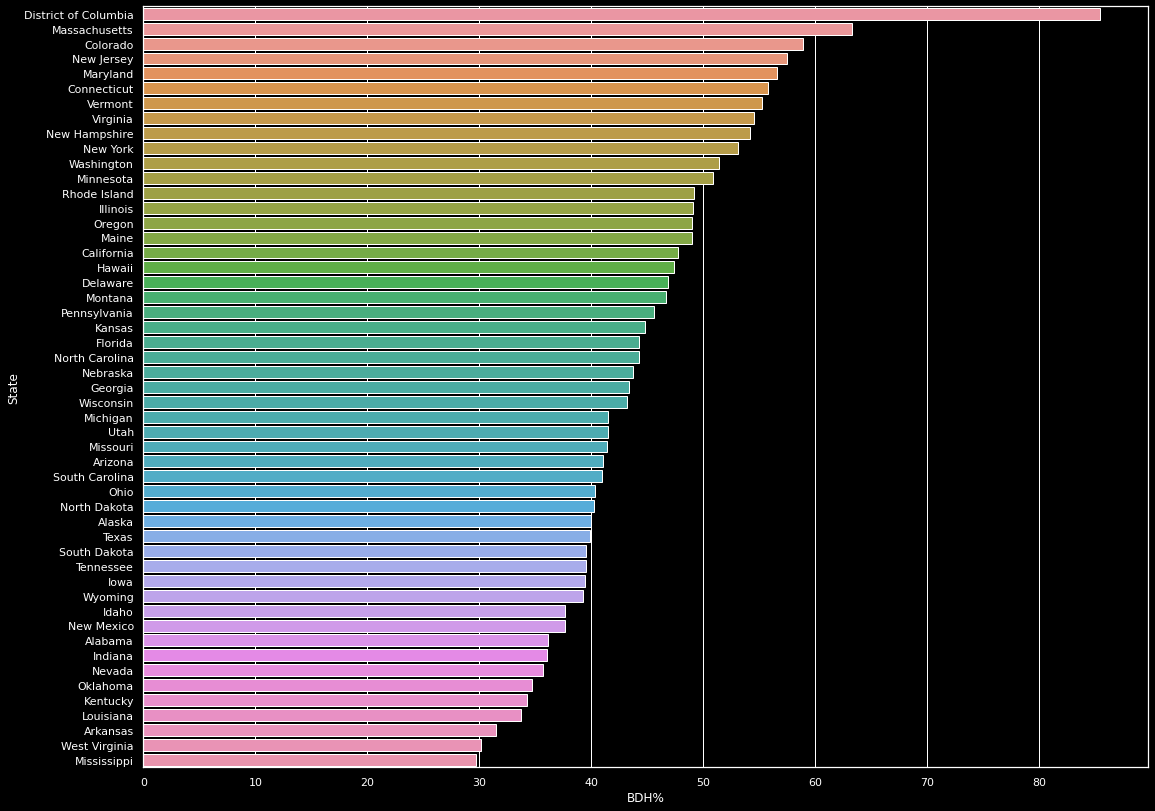

In [76]:
plt.figure(figsize=(18,14))
sns.barplot(x = "BDH%", y ='State', data = percentage_of_bachelors_degree_holders)

In [77]:
# Highest percentage of bachelor's degree holders per population are in: 
# District of Columbia, Massachusetts and Colorado.
# Lowest percentage of bachelor's degree holders per population are in: Arkansas, West Virginia and Mississippi.
# The one interesting fact regarding our dataset is, When we compared based on number of bachelor's degree holders, 
# california was in the first place, but now we can find it in the 17th position.

In [78]:
# Comparing the percentage of bachelor's degree holders per population by states in each major

degree_holders_per_population_by_states=new
degree_holders_per_population_by_states

,State,Population,Bachelor's Degree Holders,BDH%,Science and Engineering,SAE%,Science and Engineering Related Fields,SAERF%,Business,Business%,Education,Education%,"Arts, Humanities and Others","Arts, Humanities and Others%",Sex_N,Age_N
8,District of Columbia,705749,602858,85.421021,292418,48.505286,31224,5.179329,78228,12.976190,20502,3.400801,180486,29.938393,4,12
21,Massachusetts,6892503,4363486,63.307713,1777636,40.738895,385720,8.839721,775344,17.768912,368336,8.441324,1056450,24.211147,4,12
5,Colorado,5758736,3391204,58.887992,1325672,39.091485,286724,8.454932,694666,20.484347,297194,8.763672,786948,23.205564,4,12
30,New Jersey,8882190,5103530,57.458014,1930508,37.826916,451214,8.841214,1102948,21.611473,536406,10.510490,1082454,21.209908,4,12
20,Maryland,6045680,3420460,56.576928,1398206,40.877718,310688,9.083223,634770,18.558030,303874,8.884010,772922,22.597019,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,Kentucky,4467673,1531846,34.287335,431748,28.184818,181220,11.830171,305858,19.966628,246158,16.069370,366862,23.949013,4,12
18,Louisiana,4648794,1568550,33.741009,452014,28.817315,206042,13.135826,303768,19.366166,252066,16.070001,354660,22.610691,4,12
3,Arkansas,3017804,950734,31.504167,278006,29.241197,109006,11.465457,200040,21.040585,172512,18.145138,191170,20.107622,4,12
48,West Virginia,1792147,539412,30.098647,158218,29.331568,70816,13.128369,96736,17.933602,111800,20.726272,101842,18.880188,4,12


In [79]:
degree_holders_per_population_by_states.sort_values(by='Population', ascending=False, inplace=True)
degree_holders_per_population_by_states.style.background_gradient(cmap='PuBu')

,State,Population,Bachelor's Degree Holders,BDH%,Science and Engineering,SAE%,Science and Engineering Related Fields,SAERF%,Business,Business%,Education,Education%,"Arts, Humanities and Others","Arts, Humanities and Others%",Sex_N,Age_N
4,California,39512223,18856968,47.724392,7859122,41.677549,1562792,8.287610,3442188,18.254197,1160732,6.155454,4832134,25.625191,4,12
43,Texas,28995881,11553066,39.843818,4069196,35.221784,1104824,9.563037,2681380,23.209250,1373690,11.890264,2323976,20.115665,4,12
9,Florida,21477737,9507274,44.265716,3041262,31.988791,1020650,10.735464,2311390,24.311806,1227002,12.905929,1906970,20.058010,4,12
32,New York,19453561,10332436,53.113340,3578158,34.630343,959342,9.284761,1929774,18.676854,1091084,10.559794,2774078,26.848248,4,12
38,Pennsylvania,12801989,5834804,45.577324,1945316,33.339869,650320,11.145533,1114576,19.102201,805888,13.811741,1318704,22.600656,4,12
13,Illinois,12671821,6217944,49.069064,2090448,33.619602,620094,9.972653,1324236,21.297007,752174,12.096828,1430992,23.013909,4,12
35,Ohio,11689100,4713170,40.321068,1453496,30.839032,554424,11.763293,1006554,21.356200,702404,14.903006,996292,21.138469,4,12
10,Georgia,10617423,4603136,43.354550,1506996,32.738464,430928,9.361618,1090502,23.690415,596014,12.947999,978696,21.261505,4,12
33,North Carolina,10488084,4642370,44.263280,1601842,34.504833,466324,10.044955,943394,20.321388,561926,12.104292,1068884,23.024533,4,12
22,Michigan,9986857,4141590,41.470405,1388104,33.516210,463032,11.180054,877054,21.176746,548288,13.238587,865112,20.888403,4,12


In [80]:
degree_holders_per_population_by_states = degree_holders_per_population_by_states[['State', 'BDH%', 'SAE%','SAERF%','Business%', 'Education%', 'Arts, Humanities and Others%']]
degree_holders_per_population_by_states

,State,BDH%,SAE%,SAERF%,Business%,Education%,"Arts, Humanities and Others%"
4,California,47.724392,41.677549,8.287610,18.254197,6.155454,25.625191
43,Texas,39.843818,35.221784,9.563037,23.209250,11.890264,20.115665
9,Florida,44.265716,31.988791,10.735464,24.311806,12.905929,20.058010
32,New York,53.113340,34.630343,9.284761,18.676854,10.559794,26.848248
38,Pennsylvania,45.577324,33.339869,11.145533,19.102201,13.811741,22.600656
...,...,...,...,...,...,...,...
34,North Dakota,40.258404,27.385803,15.656760,20.344596,18.926707,17.686135
1,Alaska,39.958444,39.255732,9.733369,15.399194,11.824955,23.786750
8,District of Columbia,85.421021,48.505286,5.179329,12.976190,3.400801,29.938393
45,Vermont,55.216358,38.150715,8.686264,10.681945,13.389291,29.091785


<AxesSubplot:ylabel='State'>

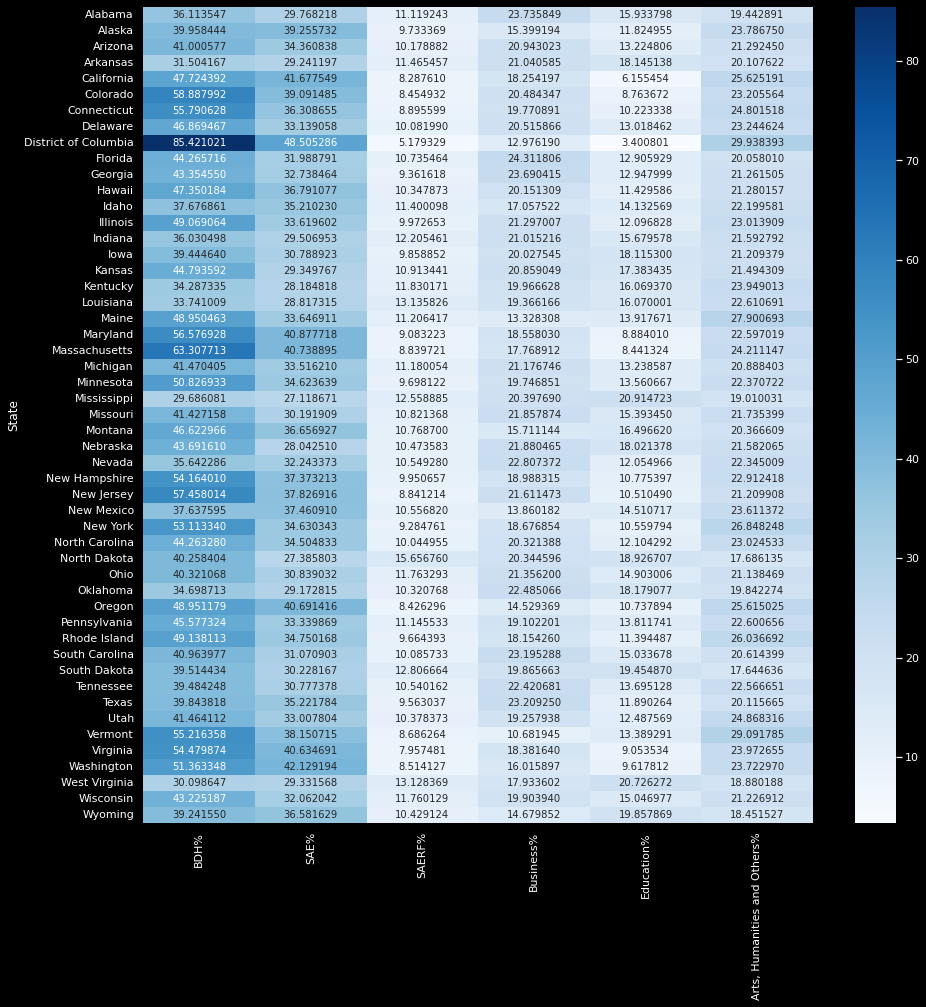

In [81]:
plt.figure(figsize=(15,15))
degree_holders_per_population_by_states = degree_holders_per_population_by_states.groupby(['State']).sum()
sns.heatmap(degree_holders_per_population_by_states, annot=True, fmt="f", cmap='Blues')